<a href="https://colab.research.google.com/github/Athman-Athman/RESEARCH/blob/main/RESEARCH_DATA_ANALYSIS_VTT_NOV_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA

In [13]:
# Importing libraries and reloading the data
import pandas as pd

# Loading the dataset
file_path = './DATA_RESEARCH - Copy.xlsx'
data = pd.read_excel(file_path)

# Retrieving the number of rows and columns
rows, columns = data.shape

rows, columns


(3091, 81)

In [19]:
# Display the variables (column names) in Sheet1
variables = sheet1_data.columns.tolist()

variables


['SN',
 'VESSEL',
 'REFERENCE NUMBER',
 'VOYAGE NUMBER',
 'LOA',
 'ROT',
 'BERTH',
 'DRAFT (ARRIVAL)',
 'DRAFT (DEPARTURE)',
 'LINE',
 'SERVICE',
 "DISCHARGED-(FULL/ FCL-20')",
 "DISCHARGED-(FULL/ FCL-40')",
 "DISCHARGED-(FULL/ LCL-20')",
 "DISCHARGED-(FULL/ LCL-40')",
 "DISCHARGED-(EMPTY-20')",
 "DISCHARGED-(EMPTY-40')",
 "DISCHARGED-(REEFER-20')",
 "DISCHARGED-(REEFER-40')",
 "DISCHARGED-(HAZARDOUS-20')",
 "DISCHARGED-(HAZARDOUS-40')",
 "DISCHARGED-(OUT OF GAUGE-20')",
 "DISCHARGED-(OUT OF GAUGE-40')",
 "DISCHARGED-(TRANS SHIPMENT-20')",
 "DISCHARGED-(TRANS SHIPMENT-40')",
 "DISCHARGED-(ON BOARD SHIFTING-20')",
 "DISCHARGED-(ON BOARD SHIFTING-40')",
 "DISCHARGED-(SHIFTING VIA QUAY-20')",
 "DISCHARGED-(SHIFTING VIA QUAY-40')",
 "LOADED-(FULL/ FCL-20')",
 "LOADED-(FULL/ FCL-40')",
 "LOADED-(FULL/ LCL-20')",
 "LOADED-(FULL/ LCL-40')",
 "LOADED-(EMPTY-20')",
 "LOADED-(EMPTY-40')",
 "LOADED-(REEFER-20')",
 "LOADED-(REEFER-40')",
 "LOADED-(HAZARDOUS-20')",
 "LOADED-(HAZARDOUS-40')",
 "LOAD

In [27]:
# Convert date columns to datetime format,
date_columns = ['ARRIVED_O/A', 'ARRIVED_BERTH', 'COMMENCE_OPS', 'COMPL._OP', 'TIME/DATE_SAILED']

for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

In [28]:
# Display unique values of the 'MACHINE TYPE' column
unique_machine_types = data['MACHINE TYPE'].unique()

unique_machine_types


array(['SSG', 'SC', nan, 'SSG ', 'SS', 'SC ', 'SCG', 'SGG'], dtype=object)

In [30]:
# Replace 'SS' with 'SC' in the 'MACHINE TYPE' column
data['MACHINE TYPE'] = data['MACHINE TYPE'].str.strip()
data['MACHINE TYPE'] = data['MACHINE TYPE'].replace('SS','SC')
data['MACHINE TYPE'] = data['MACHINE TYPE'].replace('SGG','SSG')
data['MACHINE TYPE'] = data['MACHINE TYPE'].replace('SCG','SSG')

# Re-check unique values after replacement
unique_machine_types_final = data['MACHINE TYPE'].unique()

# Display the updated unique values
unique_machine_types_final


array(['SSG', 'SC', nan], dtype=object)

In [160]:
from sklearn.preprocessing import LabelEncoder

# Convert 'MACHINE TYPE' to numeric values
if 'MACHINE TYPE' in data.columns:
    label_encoder = LabelEncoder()
    data['MACHINE_TYPE_NUMERIC'] = label_encoder.fit_transform(data['MACHINE TYPE'])

# Display the mapping for reference
machine_type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(machine_type_mapping)

{'SC': 0, 'SSG': 1, nan: 2}


In [35]:
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Calculate the new variables
data['WAITING_TIME_TO_DOCK'] = data['ARRIVED BERTH'] - data['ARRIVED O/A']
data['WAITING_OPERATIONS'] = data['COMMENCE OPS'] - data['ARRIVED BERTH']
data['OPERATION_TIME'] = data['COMPL. OP'] - data['COMMENCE OPS']
data['UNLOADING_TIME'] = data['TIME/DATE SAILED'] - data['COMPL. OP']

# Display the updated dataset with the new variables
data.head()

,SN,VESSEL,REFERENCE NUMBER,VOYAGE NUMBER,LOA,ROT,BERTH,DRAFT (ARRIVAL),DRAFT (DEPARTURE),LINE,...,SHIP WORKING HOURS,AVGE MOVE /SW HR,PORT PRODUCTIVITY,BERTH PRODUCTIVITY,OPERATIONS PRODUCTIVITY,MACHINE TYPE,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME
0,1,WEHR WARNOW,MSKC/WEHRWAR/1201,1201,NaN,4294,9,7.6,8.7,MSK,...,20.66,25.605034,2.512467,16.318766,18.085470,SSG,7 days 09:08:00,0 days 01:10:00,1 days 05:15:00,0 days 02:00:00
1,2,ROYAL ZANZIBAR,MSCC/ROYZAN/1007R,1007R,NaN,4353,10,3.2,4.5,MSC,...,11.75,8.340426,0.746004,4.215054,4.900000,SC,4 days 11:07:00,0 days 01:05:00,0 days 20:00:00,0 days 02:10:00
2,3,MANTENHA,MSCC/MVMANT/160R,160R,NaN,4270,9,3.4,4.5,MSC,...,12.25,8.163265,0.346861,3.296703,3.921569,SC,40 days 17:58:00,-30 days +00:50:00,1 days 01:30:00,0 days 04:00:00
3,4,PARDIS,HDSC/PARDIS/SAS0017,SAS0017,NaN,4259,11,11.4,9.7,HDSC,...,48.57,23.800700,3.630463,17.232298,18.595174,SSG,10 days 10:20:00,0 days 02:10:00,2 days 14:10:00,0 days 02:45:00
4,5,MSC JASMINE,MSCC/MSCJAS/52R,52R,NaN,4299,9,11.2,10,MSC,...,29.00,30.275862,3.053913,19.191257,21.029940,SSG,10 days 00:45:00,0 days 01:30:00,1 days 17:45:00,0 days 02:30:00


In [86]:
# Filter the dataset to show rows where any of the new variables have negative values
negative_values = data[
    (data['WAITING_TIME_TO_DOCK'] < pd.Timedelta(0)) |
    (data['WAITING_OPERATIONS'] < pd.Timedelta(0)) |
    (data['OPERATION_TIME'] < pd.Timedelta(0)) |
    (data['UNLOADING_TIME'] < pd.Timedelta(0))
]
negative_values[['WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME', 'UNLOADING_TIME']]


,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME
2,40 days 17:58:00,-30 days +00:50:00,1 days 01:30:00,0 days 04:00:00
345,1 days 02:35:00,1 days 01:30:00,-1 days +17:50:00,0 days 01:20:00
469,2 days 11:44:00,-1 days +19:25:00,2 days 03:15:00,0 days 12:40:00
488,3 days 07:20:00,-1 days +21:10:00,2 days 23:30:00,0 days 01:00:00
628,-18 days +14:50:00,18 days 01:55:00,2 days 06:40:00,0 days 03:00:00
726,1 days 18:25:00,0 days 01:43:00,-28 days +09:52:00,29 days 01:00:00
842,2 days 01:54:00,-1 days +23:04:00,2 days 14:50:00,0 days 00:30:00


In [105]:
# Count the number of rows with negative values for each of the new variables
negative_counts = {
    'WAITING_TIME_TO_DOCK': (data['WAITING_TIME_TO_DOCK'] < pd.Timedelta(0)).sum(),
    'WAITING_OPERATIONS': (data['WAITING_OPERATIONS'] < pd.Timedelta(0)).sum(),
    'OPERATION_TIME': (data['OPERATION_TIME'] < pd.Timedelta(0)).sum(),
    'UNLOADING_TIME': (data['UNLOADING_TIME'] < pd.Timedelta(0)).sum()
}
negative_counts


{'WAITING_TIME_TO_DOCK': 1,
 'WAITING_OPERATIONS': 4,
 'OPERATION_TIME': 2,
 'UNLOADING_TIME': 0}

In [144]:
# Drop rows with negative values in any of the newly created variables
cleaned_data = data[
    (data['WAITING_TIME_TO_DOCK'] >= pd.Timedelta(0)) &
    (data['WAITING_OPERATIONS'] >= pd.Timedelta(0)) &
    (data['OPERATION_TIME'] >= pd.Timedelta(0)) &
    (data['UNLOADING_TIME'] >= pd.Timedelta(0))
]

# Display the shape of the dataset after dropping rows
cleaned_data.shape


(3083, 792)

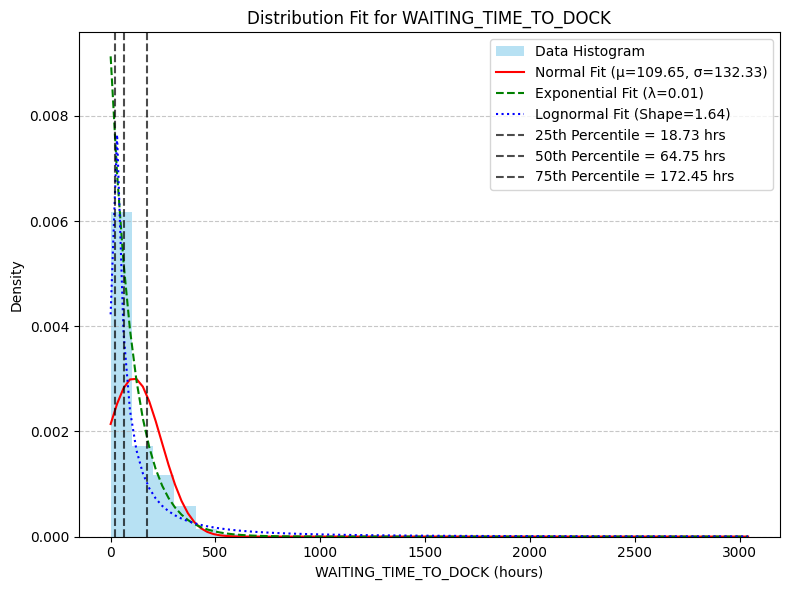

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, lognorm

# Convert datetime data to total hours (for numeric operations)
cleaned_data = cleaned_data['WAITING_TIME_TO_DOCK'].dropna()
cleaned_data = cleaned_data.dt.total_seconds() / 3600  # Convert to hours

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the cleaned data histogram
plt.hist(cleaned_data, bins=30, density=True, alpha=0.6, color='skyblue', label='Data Histogram')

# Fit and plot normal distribution
mu, std = norm.fit(cleaned_data)
x = np.linspace(cleaned_data.min(), cleaned_data.max(), 100)
p_norm = norm.pdf(x, mu, std)
plt.plot(x, p_norm, 'r-', label=f'Normal Fit (μ={mu:.2f}, σ={std:.2f})')

# Fit and plot exponential distribution
loc, scale = expon.fit(cleaned_data)
p_expon = expon.pdf(x, loc, scale)
plt.plot(x, p_expon, 'g--', label=f'Exponential Fit (λ={1/scale:.2f})')

# Fit and plot lognormal distribution
shape, loc_ln, scale_ln = lognorm.fit(cleaned_data, floc=0)
p_lognorm = lognorm.pdf(x, shape, loc_ln, scale_ln)
plt.plot(x, p_lognorm, 'b:', label=f'Lognormal Fit (Shape={shape:.2f})')

# Highlight percentiles
percentiles = {'25th Percentile': np.percentile(cleaned_data, 25),
               '50th Percentile': np.percentile(cleaned_data, 50),
               '75th Percentile': np.percentile(cleaned_data, 75)}
for p, value in percentiles.items():
    plt.axvline(value, color='k', linestyle='--', alpha=0.7, label=f'{p} = {value:.2f} hrs')

# Add labels and legend
plt.title('Distribution Fit for WAITING_TIME_TO_DOCK')
plt.xlabel('WAITING_TIME_TO_DOCK (hours)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


FEATURE SELECTION

In [138]:
# Define the target variable (TAT)
data['TURN_AROUND_TIME'] = pd.to_datetime(data['DROP PILOT']) - pd.to_datetime(data['ARRIVED O/A'])
data['TURN_AROUND_TIME_HOURS'] = data['TURN_AROUND_TIME'].dt.total_seconds() / 3600

In [164]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Ensure 'TURN_AROUND_TIME_HOURS' is numeric and non-NaN
cleaned_data = data.dropna(subset=['TURN_AROUND_TIME_HOURS'] + candidate_features)
cleaned_data['TURN_AROUND_TIME_HOURS'] = cleaned_data['TURN_AROUND_TIME_HOURS'].astype(float)

# Label encode 'MACHINE TYPE' if it's categorical
if 'MACHINE TYPE' in cleaned_data.columns:
    encoder = LabelEncoder()
    cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))

# Define features (X) and target (y)
candidate_features = [
    'TOTAL TEUs','WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME',
    'UNLOADING_TIME','PORT PRODUCTIVITY', 'BERTH PRODUCTIVITY',
    'OPERATIONS PRODUCTIVITY',
    'MACHINE TYPE'
]
X = cleaned_data[candidate_features]
y = cleaned_data['TURN_AROUND_TIME_HOURS']

# 1. Correlation-based feature selection
correlation_matrix = X.join(y).corr()
correlation_with_target = correlation_matrix['TURN_AROUND_TIME_HOURS'].sort_values(ascending=False)

# 2. Univariate feature selection
selector = SelectKBest(f_regression, k='all')
selector.fit(X, y)
univariate_scores = dict(zip(candidate_features, selector.scores_))

# 3. Model-based feature selection (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
feature_importances = dict(zip(candidate_features, model.feature_importances_))

# Combine results
feature_selection_results = {
    'Correlation with Target': correlation_with_target.to_dict(),
    'Univariate Scores': univariate_scores,
    'Model Importances': feature_importances
}

# Display feature selection results
print(feature_selection_results)


<ipython-input-164-b2f1623cabee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['TURN_AROUND_TIME_HOURS'] = cleaned_data['TURN_AROUND_TIME_HOURS'].astype(float)
<ipython-input-164-b2f1623cabee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))


DTypePromotionError: The DType <class 'numpy.dtypes.TimeDelta64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>)

In [166]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Ensure 'TURN_AROUND_TIME_HOURS' is numeric and non-NaN
cleaned_data = data.dropna(subset=['TURN_AROUND_TIME_HOURS'] + candidate_features)
cleaned_data['TURN_AROUND_TIME_HOURS'] = cleaned_data['TURN_AROUND_TIME_HOURS'].astype(float)

# Label encode 'MACHINE TYPE' if it's categorical
if 'MACHINE TYPE' in cleaned_data.columns:
    encoder = LabelEncoder()
    cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))

# Define features (X) and target (y)
candidate_features = [
    'TOTAL TEUs','WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME',
    'UNLOADING_TIME','PORT PRODUCTIVITY', 'BERTH PRODUCTIVITY',
    'OPERATIONS PRODUCTIVITY',
    'MACHINE TYPE'
]

# Convert Timedelta features to numeric (total seconds)
for feature in ['WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME', 'UNLOADING_TIME']:
    if feature in cleaned_data.columns:
        cleaned_data[feature] = cleaned_data[feature].dt.total_seconds()  # Convert to total seconds

X = cleaned_data[candidate_features]
y = cleaned_data['TURN_AROUND_TIME_HOURS']

# 1. Correlation-based feature selection
correlation_matrix = X.join(y).corr()
correlation_with_target = correlation_matrix['TURN_AROUND_TIME_HOURS'].sort_values(ascending=False)

# 2. Univariate feature selection
selector = SelectKBest(f_regression, k='all')
selector.fit(X, y)
univariate_scores = dict(zip(candidate_features, selector.scores_))

# 3. Model-based feature selection (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
feature_importances = dict(zip(candidate_features, model.feature_importances_))

# Combine results
feature_selection_results = {
    'Correlation with Target': correlation_with_target.to_dict(),
    'Univariate Scores': univariate_scores,
    'Model Importances': feature_importances
}

# Display feature selection results
print(feature_selection_results)

<ipython-input-166-9632c2d0c8e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['TURN_AROUND_TIME_HOURS'] = cleaned_data['TURN_AROUND_TIME_HOURS'].astype(float)
<ipython-input-166-9632c2d0c8e0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))
<ipython-input-166-9632c2d0c8e0>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

{'Correlation with Target': {'TURN_AROUND_TIME_HOURS': 1.0, 'OPERATION_TIME': 0.034121485692826616, 'WAITING_TIME_TO_DOCK': 0.027036491051150323, 'WAITING_OPERATIONS': 0.00457808865864965, 'UNLOADING_TIME': 0.002498037887468299, 'TOTAL TEUs': -0.0006060378968035765, 'PORT PRODUCTIVITY': -0.015109737503043811, 'MACHINE TYPE': -0.01638939996661377, 'OPERATIONS PRODUCTIVITY': -0.05344762694092492, 'BERTH PRODUCTIVITY': -0.05440446653934405}, 'Univariate Scores': {'TOTAL TEUs': 0.0005850803331420819, 'WAITING_TIME_TO_DOCK': 1.1652899485833612, 'WAITING_OPERATIONS': 0.033388220736203636, 'OPERATION_TIME': 1.8568532161535536, 'UNLOADING_TIME': 0.00994068993837939, 'PORT PRODUCTIVITY': 0.36377158925535547, 'BERTH PRODUCTIVITY': 4.729031851144157, 'OPERATIONS PRODUCTIVITY': 4.563678405765051, 'MACHINE TYPE': 0.42801457304124485}, 'Model Importances': {'TOTAL TEUs': 0.15112093482768743, 'WAITING_TIME_TO_DOCK': 0.11096180241958568, 'WAITING_OPERATIONS': 0.12163367029493509, 'OPERATION_TIME': 0.1

In [170]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Define target and candidate features
target = 'TURN_AROUND_TIME_HOURS'
candidate_features = [
    'TOTAL TEUs', 'WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME',
    'UNLOADING_TIME', 'PORT PRODUCTIVITY', 'BERTH PRODUCTIVITY',
    'OPERATIONS PRODUCTIVITY', 'MACHINE TYPE'
]

# Drop rows with NaN values in target or candidate features
cleaned_data = data.dropna(subset=[target] + candidate_features)

# Ensure target is numeric
cleaned_data[target] = cleaned_data[target].astype(float)

# Encode 'MACHINE TYPE' as numeric if it exists
if 'MACHINE TYPE' in cleaned_data.columns:
    encoder = LabelEncoder()
    cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))

# Convert timedelta columns to numeric (total seconds)
timedelta_features = ['WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME', 'UNLOADING_TIME']
for feature in timedelta_features:
    if feature in cleaned_data.columns:
        cleaned_data[feature] = cleaned_data[feature].dt.total_seconds()

# Define features (X) and target (y)
X = cleaned_data[candidate_features]
y = cleaned_data[target]

# Feature Selection Techniques
# 1. Correlation with Target
correlation_matrix = X.join(y).corr()
correlation_with_target = correlation_matrix[target].sort_values(ascending=False)

# 2. Univariate Feature Selection
selector = SelectKBest(f_regression, k='all')
selector.fit(X, y)
univariate_scores = dict(zip(candidate_features, selector.scores_))

# 3. Model-Based Feature Importance (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
model_importances = dict(zip(candidate_features, model.feature_importances_))

# Combine results
feature_selection_results = {
    'Correlation with Target': correlation_with_target.to_dict(),
    'Univariate Scores': univariate_scores,
    'Model Importances': model_importances
}

# Combine results into a DataFrame for tabular representation
results_table = pd.DataFrame({
    'Feature': candidate_features,
    'Correlation with Target': [feature_selection_results['Correlation with Target'].get(f, None) for f in candidate_features],
    'Univariate Scores': [feature_selection_results['Univariate Scores'].get(f, None) for f in candidate_features],
    'Model Importances': [feature_selection_results['Model Importances'].get(f, None) for f in candidate_features],
})

# Sort results by Model Importances for better readability
results_table = results_table.sort_values(by='Model Importances', ascending=False)

# Print Results
print(results_table)


<ipython-input-170-442f1e8682bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[target] = cleaned_data[target].astype(float)
<ipython-input-170-442f1e8682bd>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))
<ipython-input-170-442f1e8682bd>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

                   Feature  Correlation with Target  Univariate Scores  \
7  OPERATIONS PRODUCTIVITY                -0.053448           4.563678   
0               TOTAL TEUs                -0.000606           0.000585   
5        PORT PRODUCTIVITY                -0.015110           0.363772   
3           OPERATION_TIME                 0.034121           1.856853   
2       WAITING_OPERATIONS                 0.004578           0.033388   
1     WAITING_TIME_TO_DOCK                 0.027036           1.165290   
6       BERTH PRODUCTIVITY                -0.054404           4.729032   
4           UNLOADING_TIME                 0.002498           0.009941   
8             MACHINE TYPE                -0.016389           0.428015   

   Model Importances  
7           0.157829  
0           0.151121  
5           0.136422  
3           0.122943  
2           0.121634  
1           0.110962  
6           0.098171  
4           0.077432  
8           0.023487  


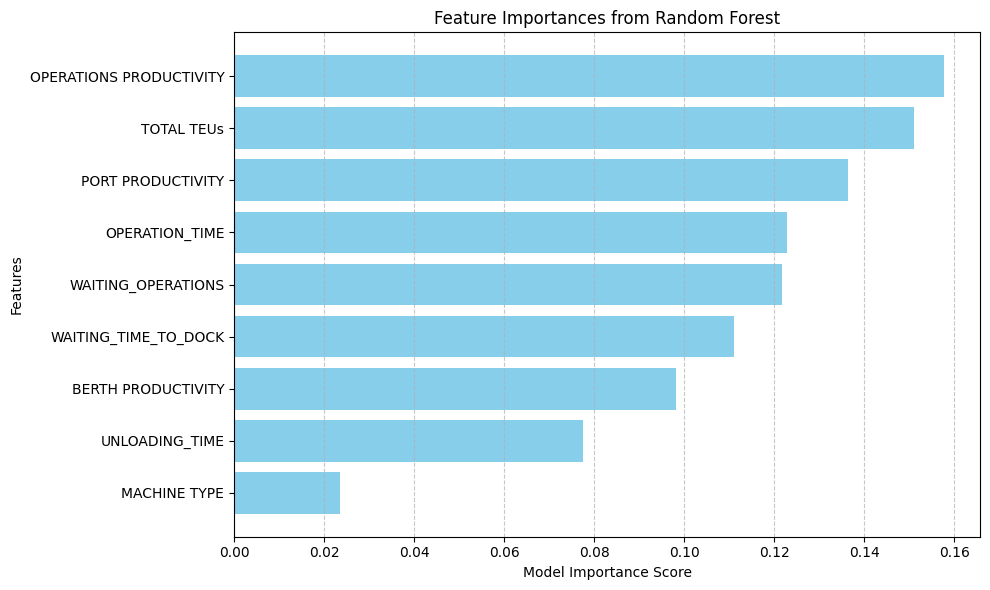

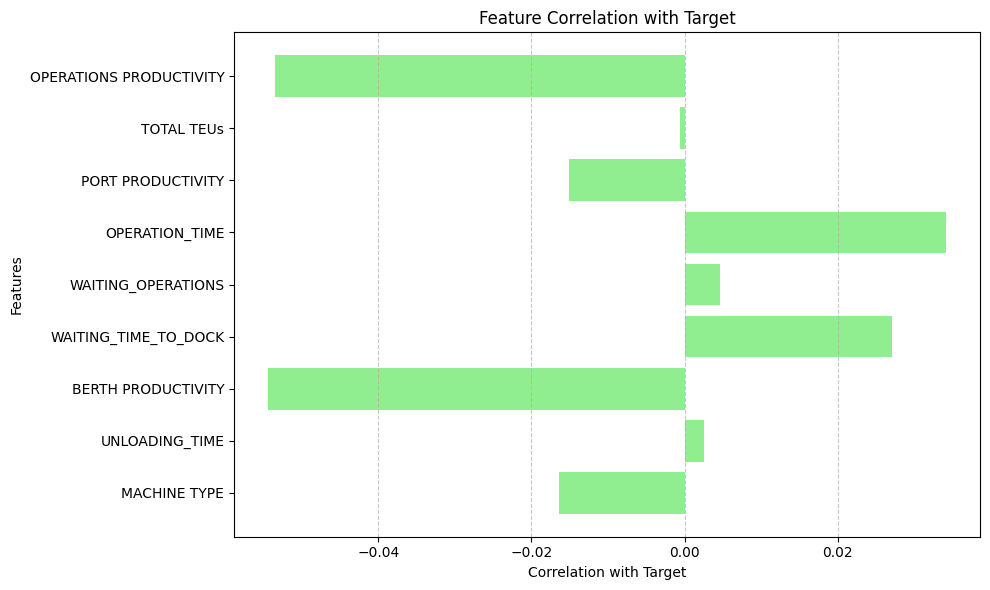

In [171]:
import matplotlib.pyplot as plt

# Visualize feature importances from Random Forest
plt.figure(figsize=(10, 6))
plt.barh(results_table['Feature'], results_table['Model Importances'], color='skyblue')
plt.xlabel('Model Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize correlation with target
plt.figure(figsize=(10, 6))
plt.barh(results_table['Feature'], results_table['Correlation with Target'], color='lightgreen')
plt.xlabel('Correlation with Target')
plt.ylabel('Features')
plt.title('Feature Correlation with Target')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


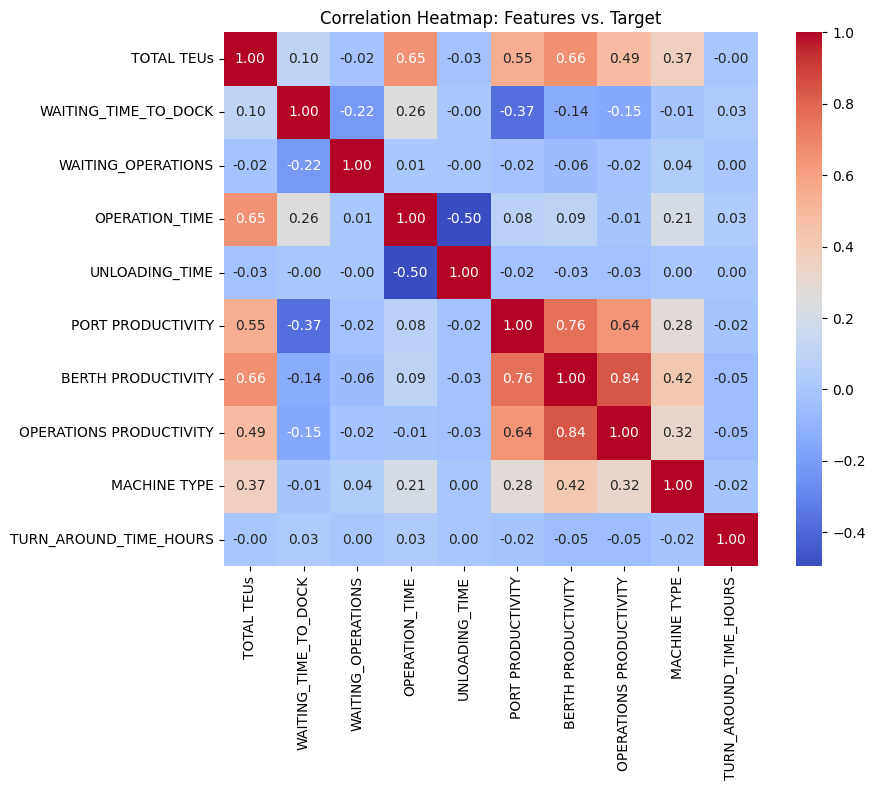

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract correlation matrix for the candidate features and target
correlation_matrix = cleaned_data[candidate_features + [target]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap: Features vs. Target')
plt.tight_layout()
plt.show()


Key Points from the Heatmap:

    Diagonal Values:
        All diagonal cells are 1.0, as they represent the correlation of each feature with itself.

    Correlation with Target (TURN_AROUND_TIME_HOURS):
        Look at the last row (TURN_AROUND_TIME_HOURS) for correlations with each feature.
        Features with stronger correlations (close to 1 or -1) are more predictive of the target.
        Example:
            MACHINE TYPE and TURN_AROUND_TIME_HOURS have a low correlation (~ -0.02).
            BERTH PRODUCTIVITY also shows minimal correlation (~ -0.05).

    Inter-feature Correlations:
        Strong inter-feature correlations can indicate multicollinearity, which might affect model performance.
        Example:
            PORT PRODUCTIVITY and BERTH PRODUCTIVITY have a strong positive correlation (~0.76).

    Feature Independence:
        Features with low correlation with others are independent and may carry unique predictive value.
        Example:
            WAITING_OPERATIONS is weakly correlated with most other features.

Observations for Feature Selection:

    Highly Correlated Features:
        BERTH PRODUCTIVITY and PORT PRODUCTIVITY are strongly correlated; consider using one of them to avoid redundancy.
    Weak Predictive Features:
        Features like UNLOADING_TIME and MACHINE TYPE show very low correlation with the target and may be excluded.
    Key Predictive Features:
        Features like OPERATION_TIME and TOTAL TEUs show moderate correlation (~0.65), making them strong candidates for inclusion.



In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate Variance Inflation Factor (VIF)
X_features = cleaned_data[candidate_features].dropna()  # Drop rows with NaN for accurate VIF calculation

# VIF calculation requires numeric data only
vif_data = pd.DataFrame()
vif_data["Feature"] = X_features.columns
vif_data["VIF"] = [variance_inflation_factor(X_features.values, i) for i in range(X_features.shape[1])]

# Display the VIF values
print(vif_data)


                   Feature        VIF
0               TOTAL TEUs  23.944410
1     WAITING_TIME_TO_DOCK   2.064011
2       WAITING_OPERATIONS   1.101672
3           OPERATION_TIME  16.733744
4           UNLOADING_TIME   2.330542
5        PORT PRODUCTIVITY   8.251969
6       BERTH PRODUCTIVITY  41.024850
7  OPERATIONS PRODUCTIVITY  16.281429
8             MACHINE TYPE  12.650358


How to Interpret VIF:

    VIF < 5: Low multicollinearity (acceptable).
    VIF 5-10: Moderate multicollinearity (may require attention).
    VIF > 10: High multicollinearity (consider removing or transforming features).


Explanation:

    VIF Calculation:
        The function calculate_vif computes the VIF for all features.

    Feature Removal:
        The feature with the highest VIF is removed iteratively until all remaining features have VIF <= 10.

    Final Output:
        Displays the refined feature set and their corresponding VIF values.

In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initial VIF calculation
current_features = cleaned_data[candidate_features].dropna()
vif_data = calculate_vif(current_features)

# Iteratively remove features with high VIF (>10)
while vif_data["VIF"].max() > 10:
    # Find the feature with the highest VIF
    high_vif_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
    print(f"Removing feature with high VIF: {high_vif_feature} (VIF={vif_data['VIF'].max():.2f})")

    # Drop the feature and recalculate VIF
    current_features = current_features.drop(columns=[high_vif_feature])
    vif_data = calculate_vif(current_features)

# Final VIF DataFrame after refinement
refined_features = current_features.columns.tolist()
final_vif_data = calculate_vif(current_features)

# Display refined features and VIF values
print("Refined Features and Their VIF:")
print(final_vif_data)


Removing feature with high VIF: BERTH PRODUCTIVITY (VIF=41.02)
Removing feature with high VIF: TOTAL TEUs (VIF=16.37)
Refined Features and Their VIF:
                   Feature       VIF
0     WAITING_TIME_TO_DOCK  2.002516
1       WAITING_OPERATIONS  1.096460
2           OPERATION_TIME  4.736560
3           UNLOADING_TIME  1.421809
4        PORT PRODUCTIVITY  5.745193
5  OPERATIONS PRODUCTIVITY  8.208998
6             MACHINE TYPE  8.259549


To optimize the refined features for modeling, we will:

    Standardize/Normalize Features:
        Ensure that all numeric features are scaled to have a similar range for better model performance.

    Handle Remaining Multicollinearity:
        Use Principal Component Analysis (PCA) or select uncorrelated subsets of features to reduce redundancy.

    Remove Low-Variance Features:
        Features with very low variance across the dataset may not contribute significantly to model performance.

    Check Feature-Target Relationships:
        Ensure features have a meaningful relationship with the target variable.

Implementation Plan:

    Standardize Features:
        Use StandardScaler to scale numeric features.

    Remove Low-Variance Features:
        Use VarianceThreshold to drop features with near-zero variance.

    Check and Address Remaining Multicollinearity:
        Use Variance Inflation Factor (VIF) or PCA.

    Reassess Model Performance:
        Fit a baseline model with the optimized feature set and validate its performance.

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Standardize Features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(current_features)
X_standardized_df = pd.DataFrame(X_standardized, columns=refined_features)

# Step 2: Remove Low-Variance Features
low_variance_filter = VarianceThreshold(threshold=0.01)  # Threshold for low variance
X_low_variance = low_variance_filter.fit_transform(X_standardized_df)
selected_features = X_standardized_df.columns[low_variance_filter.get_support()]

# Step 3: Check Multicollinearity (VIF)
X_vif = pd.DataFrame(X_low_variance, columns=selected_features)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Remove features with high VIF (>10)
while vif_data["VIF"].max() > 10:
    high_vif_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
    print(f"Removing feature with high VIF: {high_vif_feature}")
    X_vif = X_vif.drop(columns=[high_vif_feature])
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Final Optimized Features
optimized_features = X_vif.columns.tolist()

# Step 4: Output Optimized Features
print("Optimized Feature Set:")
print(optimized_features)

# Ready-to-use Optimized Features
X_optimized = X_vif


Optimized Feature Set:
['WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME', 'UNLOADING_TIME', 'PORT PRODUCTIVITY', 'OPERATIONS PRODUCTIVITY', 'MACHINE TYPE']


In [180]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Step 1: Standardize Features (mean=0, std=1)
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X_optimized)

# Step 2: Normalize Features (range [0, 1])
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X_optimized)

# Create DataFrames for better readability
standardized_df = pd.DataFrame(X_standardized, columns=optimized_features)
normalized_df = pd.DataFrame(X_normalized, columns=optimized_features)

# Display or Save the DataFrames
print("Standardized Features:")
print(standardized_df.head())

print("\nNormalized Features:")
print(normalized_df.head())


Standardized Features:
   WAITING_TIME_TO_DOCK  WAITING_OPERATIONS  OPERATION_TIME  UNLOADING_TIME  \
0              0.905549           -0.076192       -0.589497       -0.074972   
1              0.304721           -0.079799       -0.847530       -0.065592   
2              7.777680          -31.256135       -0.694105        0.037596   
3              1.533695           -0.032906        0.328729       -0.032759   
4              1.451458           -0.061763       -0.240803       -0.046830   

   PORT PRODUCTIVITY  OPERATIONS PRODUCTIVITY  MACHINE TYPE  
0          -0.984404                -0.215356      0.304082  
1          -1.200827                -1.462355     -3.288589  
2          -1.249729                -1.554889     -3.288589  
3          -0.847430                -0.167151      0.304082  
4          -0.918067                 0.063114      0.304082  

Normalized Features:
   WAITING_TIME_TO_DOCK  WAITING_OPERATIONS  OPERATION_TIME  UNLOADING_TIME  \
0              0.171870      

MODEL DEVELOPMENT

In [182]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_optimized,
    cleaned_data['TURN_AROUND_TIME_HOURS'],
    test_size=0.2,
    random_state=42
)

# Models to develop
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "Neural Network": MLPRegressor(random_state=42, max_iter=1000)
}

# Step 2: Train and evaluate models
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        "Mean Absolute Error (MAE)": mae,
        "Root Mean Squared Error (RMSE)": rmse,
        "R-squared (R²)": r2
    }

# Step 3: Display results
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)


Model Evaluation Results:
                        Mean Absolute Error (MAE)  \
Random Forest                        10905.685698   
Support Vector Machine                5091.137076   
Neural Network                        8707.496466   

                        Root Mean Squared Error (RMSE)  R-squared (R²)  
Random Forest                             46450.274947       -0.069116  
Support Vector Machine                    45201.515617       -0.012405  
Neural Network                            44809.312983        0.005088  


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics Used:

    Mean Absolute Error (MAE): Average magnitude of prediction errors.
    Root Mean Squared Error (RMSE): Square root of the average squared errors.
    R-squared (R²): Proportion of variance explained by the model.

Optimize model hyperparameters for better accuracy

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Step 1: Define hyperparameter grids
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "epsilon": [0.01, 0.1, 1],
        "kernel": ["linear", "rbf"]
    },
    "Neural Network": {
        "hidden_layer_sizes": [(50,), (100,), (50, 50)],
        "activation": ["relu", "tanh"],
        "learning_rate": ["constant", "adaptive"]
    }
}

# Step 2: Perform Grid Search for each model
optimized_results = {}
best_estimators = {}

for model_name, param_grid in param_grids.items():
    print(f"Optimizing {model_name}...")
    if model_name == "Random Forest":
        model = RandomForestRegressor(random_state=42)
    elif model_name == "Support Vector Machine":
        model = SVR()
    elif model_name == "Neural Network":
        model = MLPRegressor(random_state=42, max_iter=1000)

    # Grid Search with Cross-Validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring="neg_mean_squared_error", verbose=1)
    grid_search.fit(X_train, y_train)

    # Store results
    best_model = grid_search.best_estimator_
    best_estimators[model_name] = best_model
    y_pred = best_model.predict(X_test)

    # Evaluate optimized model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    optimized_results[model_name] = {
        "Best Parameters": grid_search.best_params_,
        "Mean Absolute Error (MAE)": mae,
        "Root Mean Squared Error (RMSE)": rmse,
        "R-squared (R²)": r2
    }

# Step 3: Display optimized results
optimized_results_df = pd.DataFrame({
    model_name: {
        "Best Parameters": optimized_results[model_name]["Best Parameters"],
        "MAE": optimized_results[model_name]["Mean Absolute Error (MAE)"],
        "RMSE": optimized_results[model_name]["Root Mean Squared Error (RMSE)"],
        "R²": optimized_results[model_name]["R-squared (R²)"]
    }
    for model_name in optimized_results
}).T

print("Optimized Model Results:")
print(optimized_results_df)


Optimizing Random Forest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Optimizing Support Vector Machine...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Optimizing Neural Network...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Optimized Model Results:
                                                          Best Parameters  \
Random Forest           {'max_depth': 10, 'min_samples_split': 10, 'n_...   
Support Vector Machine          {'C': 0.1, 'epsilon': 1, 'kernel': 'rbf'}   
Neural Network          {'activation': 'relu', 'hidden_layer_sizes': (...   

                                MAE          RMSE        R²  
Random Forest           10825.77885  46383.207497 -0.066031  
Support Vector Machine  5125.021427  45203.021323 -0.012472  
Neural Network          8707.496466  44809.312983  0.005088  


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


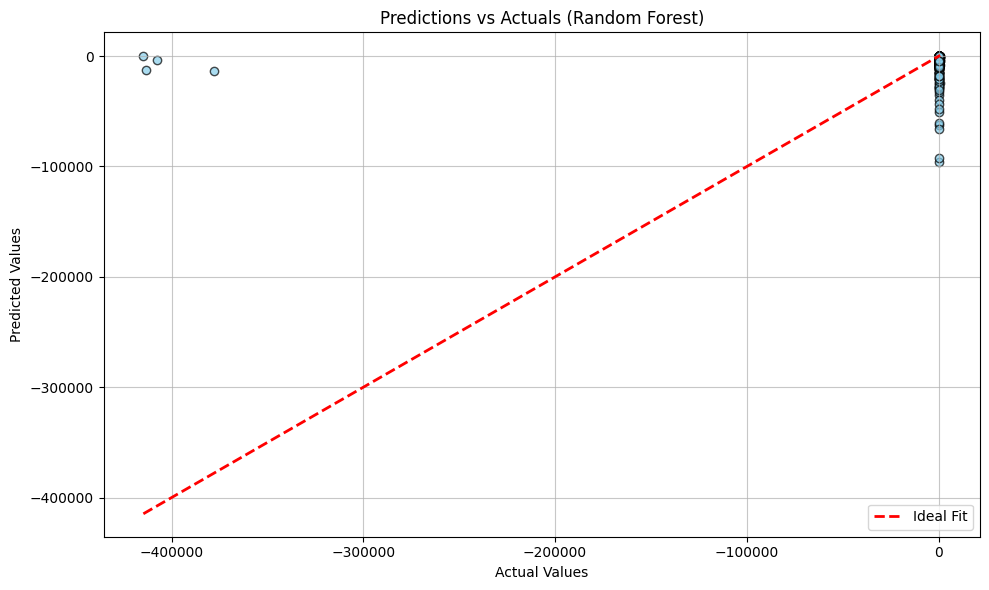

In [185]:
import matplotlib.pyplot as plt

# Use the best performing model (e.g., Random Forest) to generate predictions
best_model = best_estimators["Random Forest"]
y_pred = best_model.predict(X_test)

# Scatter plot of Predictions vs Actuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='skyblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.title('Predictions vs Actuals (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()


In [184]:
pip install xgboost lightgbm catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


To explore boosting algorithms for improved model accuracy, let's implement the following:
Algorithms to Explore:

    XGBoost: Gradient boosting with regularization and fast performance.
    LightGBM: Gradient boosting optimized for speed and efficiency.
    CatBoost: Gradient boosting designed to handle categorical features effectively.

Implementation Steps:

    Install Required Libraries:
        Install xgboost, lightgbm, and catboost if not already installed:

    pip install xgboost lightgbm catboost

Prepare Data:

    Use the optimized feature set (X_optimized) and target (TURN_AROUND_TIME_HOURS).
    Split into training and testing sets.

Train Models:

    Train each boosting algorithm with default hyperparameters for comparison.
    Evaluate metrics like MAE, RMSE, and R².

Hyperparameter Optimization:

    Use GridSearchCV or RandomizedSearchCV to fine-tune key hyperparameters.

In [186]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_optimized,
    cleaned_data['TURN_AROUND_TIME_HOURS'],
    test_size=0.2,
    random_state=42
)

# Define models
models = {
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)
}

# Train and evaluate models
boosting_results = {}

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Evaluate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    # Store results
    boosting_results[model_name] = {
        "Mean Absolute Error (MAE)": mae,
        "Root Mean Squared Error (RMSE)": rmse,
        "R-squared (R²)": r2
    }

# Display results
boosting_results_df = pd.DataFrame(boosting_results).T
print(boosting_results_df)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1321
[LightGBM] [Info] Number of data points in the train set: 1276, number of used features: 7
[LightGBM] [Info] Start training from score -5462.238026
          Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  \
XGBoost                12586.508318                    48613.378634   
LightGBM               17543.139573                    49247.913183   
CatBoost               11172.962306                    47374.428090   

          R-squared (R²)  
XGBoost        -0.171008  
LightGBM       -0.201777  
CatBoost       -0.112081  


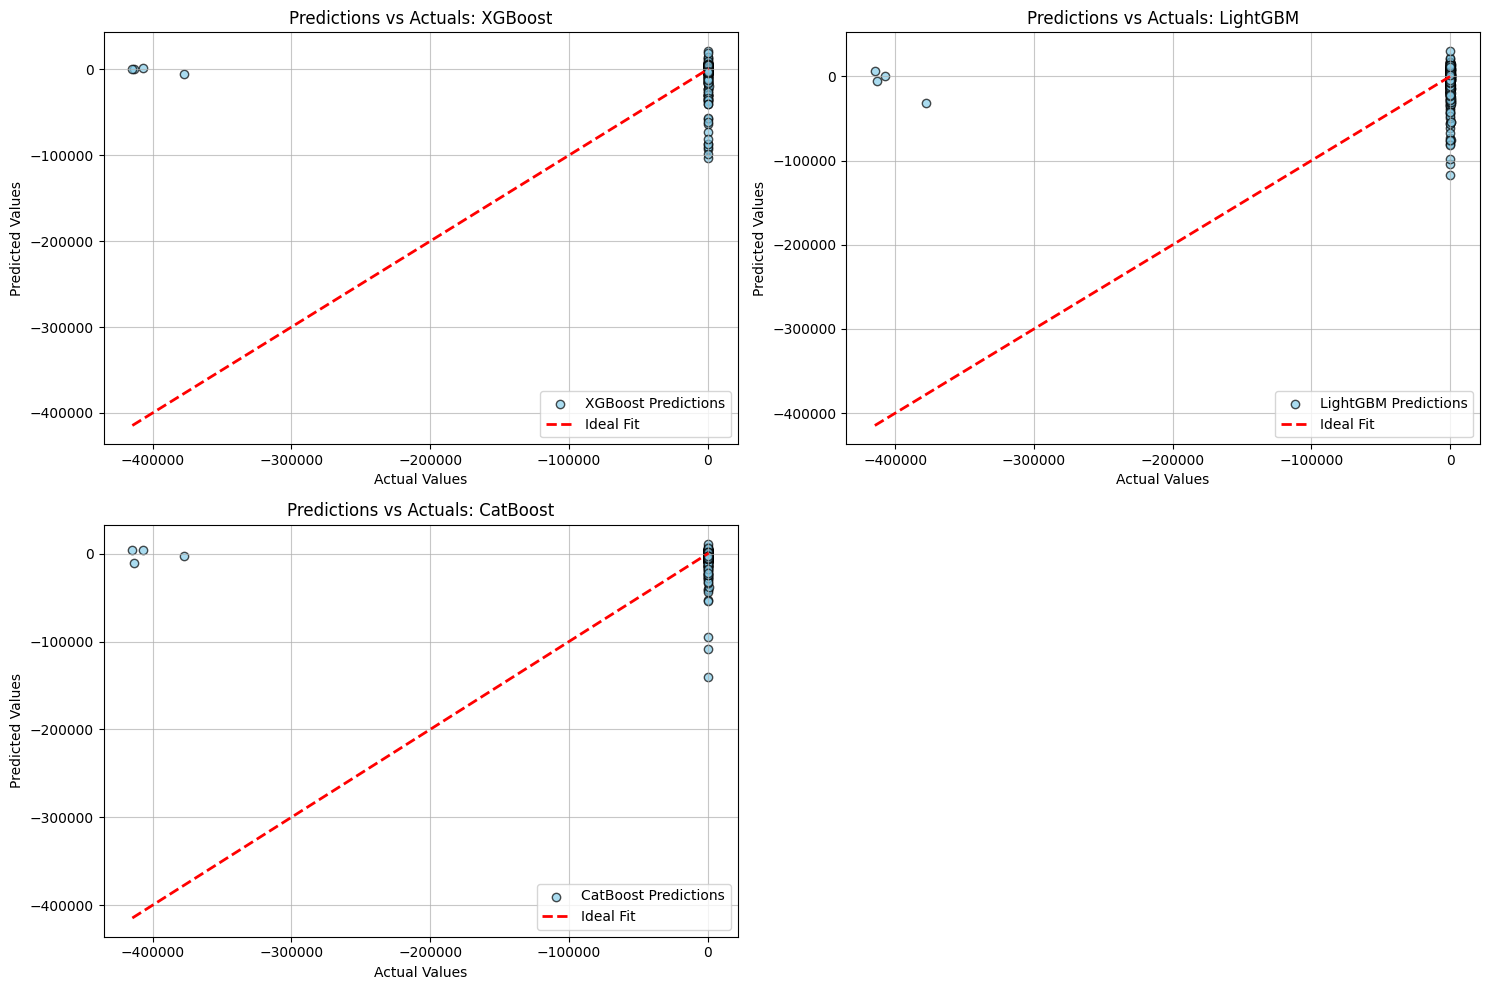

In [187]:
import matplotlib.pyplot as plt

# Visualize predictions vs actual values for all boosting models
plt.figure(figsize=(15, 10))

for i, (model_name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.7, label=f'{model_name} Predictions', color='skyblue', edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
    plt.title(f'Predictions vs Actuals: {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(alpha=0.7)

plt.tight_layout()
plt.show()


Insights from the Predictions vs. Actuals Plots:

    General Trend:
        The red dashed line represents the ideal fit (perfect predictions).
        Points clustered around the line indicate accurate predictions.
        Significant deviation from the line indicates poor performance or systematic prediction errors.

    XGBoost:
        Predictions deviate significantly from the ideal fit for many data points.
        Large clusters of points far from the red line suggest systematic errors or potential issues with feature engineering or data scaling.

    LightGBM:
        Similar trends to XGBoost, with noticeable deviations for extreme values.
        The performance might improve with better hyperparameter tuning or refined features.

    CatBoost:
        CatBoost shows slightly tighter clustering around the ideal fit line compared to XGBoost and LightGBM.
        This indicates that it may be handling categorical data or relationships better, but it still struggles with extreme predictions.

    Systematic Issues:
        All models struggle with extreme values, as evidenced by the points far from the ideal fit line.
        Outliers or skewed distributions in the target variable might be contributing to these errors.

Recommendations to Improve Performance:

    Feature Engineering:
        Address outliers and transform skewed features to normalize their distributions.
        Introduce interaction terms or polynomial features to capture non-linear relationships.

    Hyperparameter Tuning:
        Further tune parameters, particularly for LightGBM and CatBoost, as they might handle extreme values better with appropriate settings.

    Target Transformation:
        Apply log or square root transformations to the target variable to reduce the impact of extreme values.

    Error Analysis:
        Examine residuals (actual - predicted) to identify systematic biases or patterns in the errors.

    Ensemble Methods:
        Combine model predictions (e.g., averaging) to leverage the strengths of each model and reduce individual model weaknesses.

**Apply PCA to further refine features**

Outputs:

    Number of Components:
        Displays how many principal components were selected to explain 95% of the variance.
    Cumulative Explained Variance:
        The total variance preserved in the PCA-transformed dataset.
    Transformed Features:
        A new dataset with features reduced to the selected principal components (PC1, PC2, etc.).

Next Steps:

    Retrain Models:
        Use the PCA-transformed dataset (X_pca_df) to train boosting models (e.g., XGBoost, LightGBM, CatBoost).
    Compare Results:
        Evaluate model performance using metrics like MAE, RMSE, and R² to see the impact of PCA.

In [192]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected_features)

# Apply PCA
pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Number of components selected
n_components = pca.n_components_
explained_variance = pca.explained_variance_ratio_.cumsum()

# Create a DataFrame for PCA-transformed features
pca_feature_names = [f'PC{i+1}' for i in range(n_components)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_feature_names)

# Display PCA results
print(f"Number of Components: {n_components}")
print(f"Cumulative Explained Variance: {explained_variance[-1]:.2f}")
print("\nPCA-Transformed Features:")
print(X_pca_df.head())


Number of Components: 6
Cumulative Explained Variance: 0.97

PCA-Transformed Features:
        PC1       PC2        PC3        PC4       PC5       PC6
0 -0.959523  0.080796  -0.484959   0.569555 -0.054129 -0.884328
1 -3.041790 -0.974584   0.738970  -1.817026 -1.036298  0.268136
2 -7.557771  4.935394 -25.772818 -15.807126  7.521945  0.292969
3 -0.982345  0.915660  -0.690503   0.832169 -0.453278 -0.348137
4 -0.908853  0.497449  -0.775657   0.748882 -0.499492 -0.786117


In [194]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import pandas as pd
import numpy as np

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_features,
    y,
    test_size=0.2,
    random_state=42
)

# Step 2: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply PCA
pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 4: Train XGBoost model with PCA features
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_pca, y_train)

# Step 5: Evaluate model
y_pred = xgb_model.predict(X_test_pca)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display results
print(f"XGBoost with PCA Features - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")


XGBoost with PCA Features - MAE: 11887.24, RMSE: 51105.29, R²: -0.29


In [195]:
from sklearn.decomposition import PCA

# Apply PCA with 99% variance preservation
pca_adjusted = PCA(n_components=0.99)

# Fit PCA on the scaled training data and transform both train and test sets
X_train_pca_adjusted = pca_adjusted.fit_transform(X_train_scaled)
X_test_pca_adjusted = pca_adjusted.transform(X_test_scaled)

# Number of components selected with the new threshold
adjusted_n_components = pca_adjusted.n_components_
adjusted_explained_variance = pca_adjusted.explained_variance_ratio_.cumsum()

# Display the number of components and cumulative explained variance
print(f"Number of Components (99% Variance): {adjusted_n_components}")
print(f"Cumulative Explained Variance: {adjusted_explained_variance[-1]:.2f}")


Number of Components (99% Variance): 7
Cumulative Explained Variance: 1.00


In [196]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train and evaluate boosting models with the adjusted PCA-transformed features
boosting_results_adjusted_pca = {}

for model_name, model in boosting_models.items():
    # Train model using PCA-transformed features with adjusted variance
    model.fit(X_train_pca_adjusted, y_train)
    # Predict on the PCA-transformed test set
    y_pred_adjusted_pca = model.predict(X_test_pca_adjusted)
    # Calculate evaluation metrics
    mae_adjusted = mean_absolute_error(y_test, y_pred_adjusted_pca)
    rmse_adjusted = np.sqrt(mean_squared_error(y_test, y_pred_adjusted_pca))
    r2_adjusted = r2_score(y_test, y_pred_adjusted_pca)
    # Store results
    boosting_results_adjusted_pca[model_name] = {
        "Mean Absolute Error (MAE)": mae_adjusted,
        "Root Mean Squared Error (RMSE)": rmse_adjusted,
        "R-squared (R²)": r2_adjusted
    }

# Combine results from boosting methods for comparison
comparison_results_pca = pd.DataFrame(boosting_results_adjusted_pca).T

# Display the comparison results
print("Boosting Methods Accuracy Comparison (Adjusted PCA):")
print(comparison_results_pca)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 1276, number of used features: 7
[LightGBM] [Info] Start training from score -5462.238026
Boosting Methods Accuracy Comparison (Adjusted PCA):
          Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  \
XGBoost                12474.971014                    49826.895033   
LightGBM               15772.795131                    48498.998496   
CatBoost               11447.381716                    47212.197206   

          R-squared (R²)  
XGBoost        -0.230201  
LightGBM       -0.165504  
CatBoost       -0.104477  


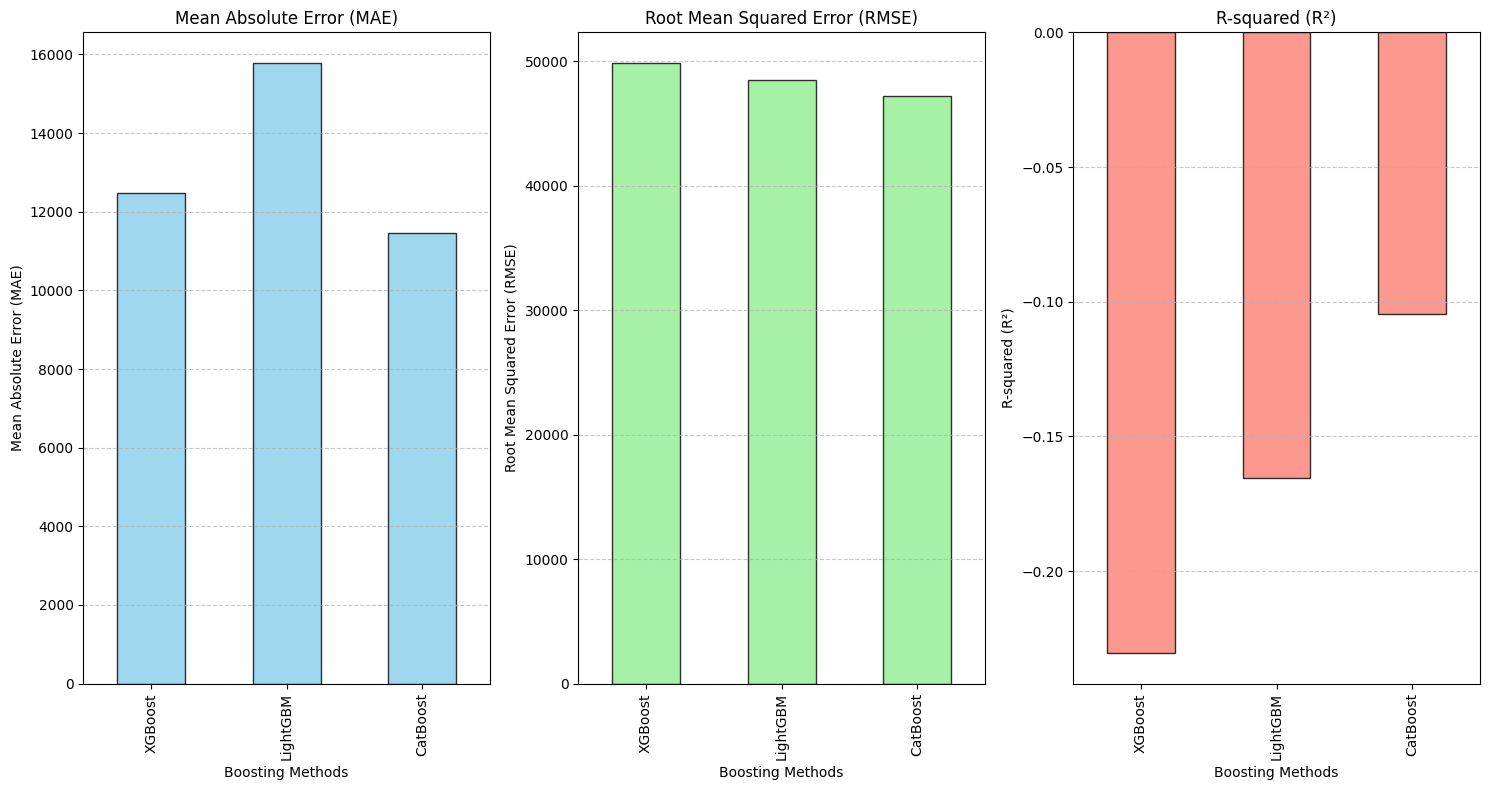

In [197]:
import matplotlib.pyplot as plt

# Plot comparison of boosting methods' accuracy (MAE, RMSE, R²)
metrics = ["Mean Absolute Error (MAE)", "Root Mean Squared Error (RMSE)", "R-squared (R²)"]
colors = ['skyblue', 'lightgreen', 'salmon']

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    comparison_results_pca[metric].plot(kind='bar', color=colors[i - 1], alpha=0.8, edgecolor='black')
    plt.title(metric)
    plt.xlabel('Boosting Methods')
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Insights from the Boosting Methods Accuracy Comparison:
1. Mean Absolute Error (MAE):

    CatBoost has the lowest MAE, indicating that it consistently makes smaller prediction errors compared to the other models.
    LightGBM has the highest MAE, suggesting larger average prediction errors.

2. Root Mean Squared Error (RMSE):

    CatBoost again has a slightly lower RMSE compared to XGBoost and LightGBM, indicating better handling of larger errors.
    All models exhibit similar RMSE values, but small differences favor CatBoost.

3. R-squared (R²):

    CatBoost has the least negative R², suggesting it explains more variance in the target variable than the others.
    Both XGBoost and LightGBM have highly negative R² values, indicating they are poor fits for the data and perform worse than a simple mean-based model.

Recommendations:

    CatBoost Preference:
        CatBoost appears to handle the data better than the other boosting methods, especially in terms of MAE and R².

    Feature Engineering:
        The negative R² values for all models suggest that the current feature set may not adequately explain the target variable. Consider:
            Adding more predictive features.
            Transforming existing features to better capture non-linear relationships.
            Addressing potential outliers in the target variable.

    Hyperparameter Tuning:
        Further tuning for CatBoost and XGBoost might improve their accuracy.
        Focus on learning rate, tree depth, and boosting iterations.

    Target Distribution:
        Analyze and transform the target variable (e.g., log transformation) if the distribution is skewed.

Analyze and transform the target variable (e.g., log transformation) if the distribution is skewed.

Explanation:

    Original Distribution:
        Helps visualize the skewness or imbalance in the target variable.
    Log Transformation:
        Applies log1p to stabilize variance and reduce skewness (especially for large outliers).
    Result:
        A smoother and more balanced target distribution for modeling.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


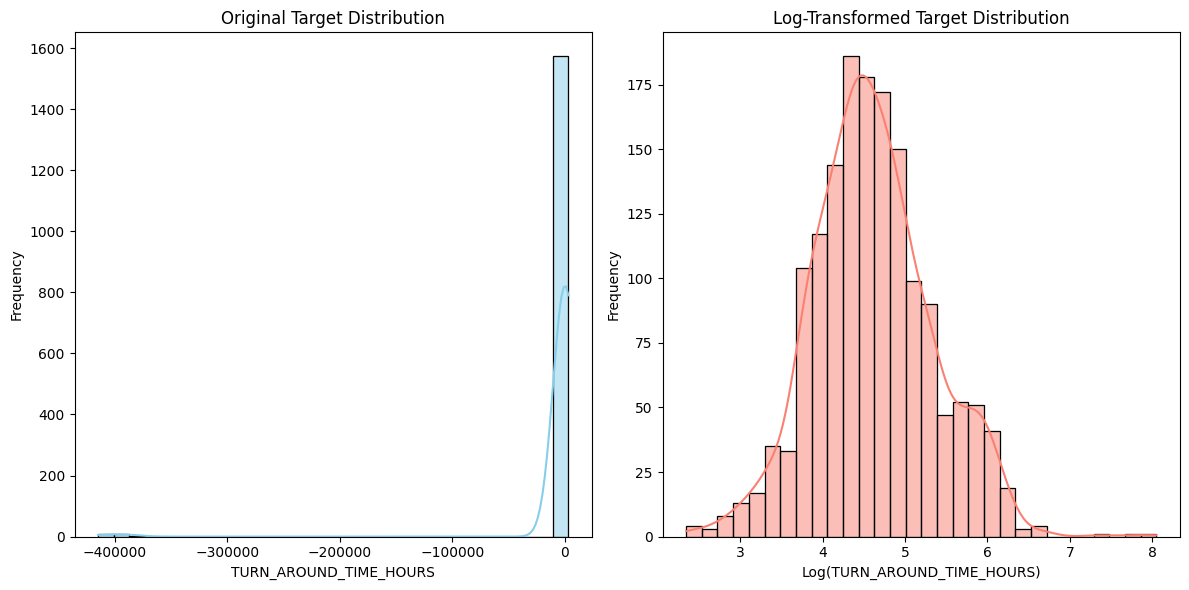

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Analyze the distribution of the target variable
plt.figure(figsize=(12, 6))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True, color='skyblue', bins=30)
plt.title('Original Target Distribution')
plt.xlabel('TURN_AROUND_TIME_HOURS')
plt.ylabel('Frequency')

# Log-transformed distribution
y_log_transformed = np.log1p(y)  # Log transformation (adding 1 to handle zero values)
plt.subplot(1, 2, 2)
sns.histplot(y_log_transformed, kde=True, color='salmon', bins=30)
plt.title('Log-Transformed Target Distribution')
plt.xlabel('Log(TURN_AROUND_TIME_HOURS)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Use log-transformed target for future modeling


Explanation:

    Filter Invalid Values:
        Only keep rows where the target is greater than 0 before log transformation.
    Log Transformation:
        Apply np.log1p() to the cleaned target variable.
    Rebuild Models:
        Train models using the cleaned dataset and compare their performance.

In [201]:
# Filter out invalid target values before log transformation
valid_target_indices = y > 0  # Keep only positive target values
X_filtered = X_selected_features[valid_target_indices]
y_filtered = y[valid_target_indices]

# Apply log transformation
y_log_filtered = np.log1p(y_filtered)

# Re-split the filtered dataset
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_filtered,
    y_log_filtered,
    test_size=0.2,
    random_state=42
)

# Rebuild models with the cleaned and log-transformed target
boosting_results_log_target_fixed = {}

for model_name, model in boosting_models.items():
    # Train model with log-transformed target
    model.fit(X_train_log, y_train_log)
    # Predict on the test set
    y_pred_log = model.predict(X_test_log)
    # Transform predictions back to the original scale
    y_pred_original_scale = np.expm1(y_pred_log)
    y_test_original_scale = np.expm1(y_test_log)
    # Calculate evaluation metrics
    mae_log = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    rmse_log = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_original_scale))
    r2_log = r2_score(y_test_original_scale, y_pred_original_scale)
    # Store results
    boosting_results_log_target_fixed[model_name] = {
        "Mean Absolute Error (MAE)": mae_log,
        "Root Mean Squared Error (RMSE)": rmse_log,
        "R-squared (R²)": r2_log
    }

# Convert results to a DataFrame
boosting_results_log_target_fixed_df = pd.DataFrame(boosting_results_log_target_fixed).T

# Display the results
print("Boosting Models with Log-Transformed Target (Filtered):")
print(boosting_results_log_target_fixed_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 1258, number of used features: 7
[LightGBM] [Info] Start training from score 4.614269
Boosting Models with Log-Transformed Target (Filtered):
          Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  \
XGBoost                    8.117229                       23.245910   
LightGBM                   8.879339                       25.902948   
CatBoost                   6.001146                       22.882773   

          R-squared (R²)  
XGBoost         0.948821  
LightGBM        0.936453  
CatBoost        0.950408  
